# Project 2: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
    <li><a href="#wrangling">General Properties</a></li>
    <li><a href="#dc-missing">Data Cleaning: Handling missing data</a></li>
    <li><a href="#dc-dtype">Data Cleaning: Fix wrong data type</a></li>
    <li><a href="#dc-mvalues">Data Cleaning: Tidy-up multiple values</a></li>
    <li><a href="#dc-break-mvalues">Data Cleaning: Break multiple values</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will investigate TMDb movie data (source: <a href='https://www.kaggle.com/tmdb/tmdb-movie-metadata/data?select=tmdb_5000_movies.csv'>Kaggle</a>). This dataset contains information about 5,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We want to answer these questions by exploring that dataset:
<ul>
    <li>Question 1: Which genres are most popular from year to year?</li>
    <li>Question 2: How distribution of movie budget and movie revenue?</li>
    <li>Question 3: What kinds of properties are associated with movies that have high revenues?</li>
</ul>

First, set up import statements for all of the packages that we will use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---------------

<a id='wrangling'></a>
## Data Wrangling

### General Properties

**Load data** and print out a few lines.

In [2]:
df_movie = pd.read_csv('../data/tmdb_movies/tmdb_5000_movies.csv')
print(df_movie.shape)
df_movie.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Inspect **non-tidy** data.<br/>
_Finding(s):_
- _`genres`, `keywords`, `production_companies`, `production_countries`, `spoken_languages` contain multiple values. Should be cleaned to be more readable._

Inspect **wrong data types**.<br/>
_Finding(s):_
- _`release_date` (str). Should be converted to date._
- _`revenue`, `budget` (int). Data type for money value should be converted to float._

In [3]:
df_movie.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Inspect **duplicated data**.<br/>
_Finding(s): No duplicated data._

In [4]:
df_movie.drop('id',axis=1).duplicated().any()

False

Inspect **missing data**.<br/>
_Finding(s): Missing data are exist on columns `homepage`, `overview`, `release_date`, `runtime`, `tagline`._

In [5]:
df_movie.isna().any()

budget                  False
genres                  False
homepage                 True
id                      False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

Inspect missing data on `release_date`.<br/>
_Finding(s):_ <br/>
- _We will remove 1 row which has missing value in `release_date` column._

In [6]:
print(df_movie['release_date'].isna().sum())
df_movie[df_movie['release_date'].isna()]

1


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


Inspect **unique values**.

In [7]:
df_movie['status'].nunique()

3

In [8]:
df_movie['status'].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [9]:
print(df_movie['status'].isin(['Post Production','Rumored']).sum())
df_movie[df_movie['status'].isin(['Post Production','Rumored'])]

8


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2906,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",https://www.facebook.com/eastsidestorymovie,357837,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 271, ""...",cs,Dancin' It's On,"This coming of age Dance Film, in the spirit o...",0.186234,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-16,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,Dancin' Like You've Never Seen Before,Dancin' It's On,4.3,2
4169,1900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,295886,[],en,Brotherly Love,West Philadelphia basketball star Sergio Taylo...,1.367751,[],[],2015-04-24,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,NaN,Brotherly Love,6.9,21
4178,2000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",http://www.sonyclassics.com/higherground/,50875,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1157, ""n...",en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.699101,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-08-26,841733,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Post Production,NaN,Higher Ground,5.3,14
4401,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,43630,[],en,The Helix... Loaded,,0.020600,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-01-01,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,The Helix... Loaded,4.8,2
4453,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,57294,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 97...",en,Crying with Laughter,Powerfully redemptive and darkly comedic reven...,0.108135,"[{""name"": ""Scottish Screen"", ""id"": 698}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-06-01,0,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,A Bad Trip Down Memory Lane,Crying with Laughter,7.0,1
4508,56000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.facebook.com/theharvestfilm,70875,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...",en,The Harvest (La Cosecha),The story of the children who work 12-14 hour ...,0.010909,[],[],2011-07-29,0,80.0,[],Rumored,NaN,The Harvest (La Cosecha),0.0,0
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1
4754,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,84659,[],en,The Naked Ape,The Naked Ape is a coming-of-age film followin...,0.077577,[],[],2006-09-16,0,110.0,[],Rumored,NaN,The Naked Ape,5.0,1


Inspect **wrong value data.**<br/>
_Finding(s):_
- There are 0 value(s) on `budget` column. We will investigate further.
- There are 0 value(s) on `runtime` columns. We will investigate further.
- 25% of observations have 0 revenue. We will investigate further.

In [10]:
df_movie.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Investigate wrong value on `budget` column.<br/>
_Finding(s):_
<ul>
<li>Right skewed distribution.</li>
<li>If we assume the busget of producing a movie is greater than or equal to \$1000 UDS, we found that there are 1069 observations which have wrong value.</li>
<li>We should remove observation data which have budget less than \$1000 USD.</li>
</ul>

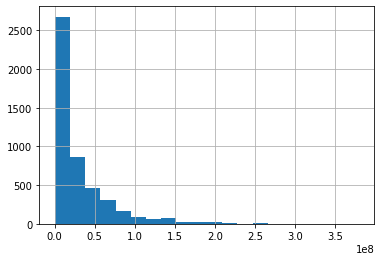

In [11]:
df_movie['budget'].hist(bins=20);

count    1069.000000
mean        2.413471
std        29.284528
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       650.000000
Name: budget, dtype: float64
There are 1069 observations which their budget less than $1000 USD.


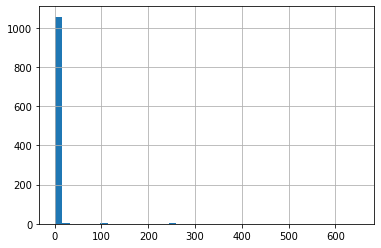

In [12]:
data = df_movie[df_movie['budget']<1000]
print(data.budget.describe())
print('There are {} observations which their budget less than $1000 USD.'. format(data.shape[0]))
data.budget.hist(bins=40);

Inspect another wrong value after we exclude observations which have budget less than $1000 USD.
- There are still 0 value(s) on `runtime` columns. We will investigate further.
- There are still 0 value(s) on `revenue` columns. We will investigate further.

In [13]:
df_movie[df_movie['budget']>=1000].describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.734000e+03,3734.000000,3734.000000,3.734000e+03,3733.000000,3734.000000,3734.000000
mean,3.736029e+07,49661.312266,26.175080,1.048403e+08,109.433432,6.234574,863.242367
std,4.269019e+07,81330.797901,34.519705,1.781406e+08,20.752011,0.939710,1348.480126
min,7.000000e+03,5.000000,0.001586,0.000000e+00,0.000000,0.000000,0.000000
25%,8.550000e+06,6972.250000,8.185175,6.743080e+06,95.000000,5.700000,119.000000
50%,2.330000e+07,11972.000000,17.709494,3.944905e+07,106.000000,6.300000,371.500000
75%,5.000000e+07,49048.500000,34.065604,1.226245e+08,120.000000,6.900000,978.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


Investigate wrong value on `runtime` column.<br/>
_Finding(s):_
<ul>
<li>If we remove observations which have 0 budget, we found there are 2 observations which have runtime equal to 0.</li>
<li>We will replace 0 value for those 2 observations by None.</li>
</ul>

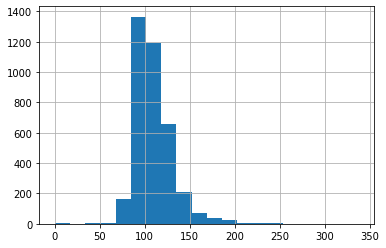

In [14]:
data = df_movie.query('budget>=1000')
data.runtime.hist(bins=20);

There are 2 observations which their runtime equal to 0.


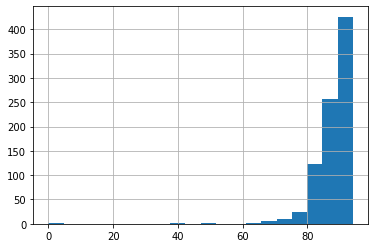

In [15]:
# Investigate observations which have runtime less than 95 mins (1st quartile)
data = df_movie.query('budget>=1000 and runtime<95')
data.runtime.hist(bins=20);
print('There are {} observations which their runtime equal to 0.'. format(data[data['runtime']==0].shape[0]))

Investigate wrong value on `revenue` column.<br/>
_Finding(s):_
<ul>
<li>There are 518 observations which have 0 revenue.</li>
<li>Zero revenue is possible where discount is higher or equal to selling price. Therefore, we will not remove observations which have 0 revenue.</li>
</ul>

In [16]:
df_movie.query('budget>=1000 and revenue>0').revenue.describe()

count    3.216000e+03
mean     1.217269e+08
std      1.865231e+08
min      7.000000e+00
25%      1.727864e+07
50%      5.564561e+07
75%      1.471350e+08
max      2.787965e+09
Name: revenue, dtype: float64

<a id='dc-missing'></a>
### Data Cleaning: Handling missing data

**Remove row(s)** which missing data `release_date` and wrong value `budget` and **copy subset dataframe**.

In [17]:
ind_na = df_movie[df_movie['release_date'].isna()].index
ind_wv = df_movie.query('budget<1000').index
ind = set(ind_wv.append(ind_na))

In [18]:
def copy_subset_df(cols):
    return df_movie.drop(ind, axis=0)[cols].copy()

In [19]:
cols_matrix = ['id','budget','revenue','runtime','popularity','vote_average','vote_count']
cols_info = ['id','homepage','original_language','original_title','overview','release_date','status','tagline','title']
cols_mgenre = ['id','genres']
cols_mcompany = ['id','production_companies']
cols_mcountry = ['id','production_countries']
cols_mlang = ['id','spoken_languages']
cols_mkey = ['id','keywords']

Copy subset of df_movie and replace 0 runtime with None.

In [20]:
# Create dataframes by copying subset of df_movie data
df_matrix = copy_subset_df(cols_matrix)
print(df_matrix.shape)

(3734, 7)


In [21]:
df_matrix['runtime'] = df_matrix['runtime'].apply(lambda x: None if x==0 else x)

In [22]:
df_info = copy_subset_df(cols_info)
df_mgenre = copy_subset_df(cols_mgenre)
df_mcompany = copy_subset_df(cols_mcompany)
df_mcountry = copy_subset_df(cols_mcountry)
df_mlang = copy_subset_df(cols_mlang)
df_mkey = copy_subset_df(cols_mkey)

<a id='dc-dtype'></a>
### Data Cleaning: Fix wrong data type

Fix **data type** `budget` and `revenue` to float.

In [23]:
df_matrix['budget'] = df_matrix['budget'].astype(float)
df_matrix['revenue'] = df_matrix['revenue'].astype(float)
df_matrix.dtypes

id                int64
budget          float64
revenue         float64
runtime         float64
popularity      float64
vote_average    float64
vote_count        int64
dtype: object

Fix **data type** `release_date` to datetime.

In [24]:
df_info['release_date'] = pd.to_datetime(df_info['release_date'], format="%Y-%m-%d")
df_info.dtypes

id                            int64
homepage                     object
original_language            object
original_title               object
overview                     object
release_date         datetime64[ns]
status                       object
tagline                      object
title                        object
dtype: object

<a id='dc-mvalues'></a>
### Data Cleaning: Tidy-up multiple values

Tidy-up **multiple values** on `genres`.

In [25]:
df_mgenre['genres_count'] = df_mgenre['genres'].str.findall('"name": "(.+?)"}').apply(lambda x: len(x))
df_mgenre['genres'] = df_mgenre['genres'].str.findall('"name": "(.+?)"}').apply('; '.join)
df_mgenre.head()

,id,genres,genres_count
0,19995,Action; Adventure; Fantasy; Science Fiction,4
1,285,Adventure; Fantasy; Action,3
2,206647,Action; Adventure; Crime,3
3,49026,Action; Crime; Drama; Thriller,4
4,49529,Action; Adventure; Science Fiction,3


In [26]:
df_mgenre.describe()

,id,genres_count
count,3734.000000,3734.000000
mean,49661.312266,2.622657
std,81330.797901,1.116484
min,5.000000,0.000000
25%,6972.250000,2.000000
50%,11972.000000,3.000000
75%,49048.500000,3.000000
max,417859.000000,7.000000


Tidy-up **multiple values** on `keywords`.

In [27]:
df_mkey['keywords_count'] = df_mkey['keywords'].str.findall('"name": "(.+?)"}').apply(lambda x: len(x))
df_mkey['keywords'] = df_mkey['keywords'].str.findall('"name": "(.+?)"}').apply('; '.join)
df_mkey.head()

,id,keywords,keywords_count
0,19995,culture clash; future; space war; space colony...,21
1,285,ocean; drug abuse; exotic island; east india t...,16
2,206647,spy; based on novel; secret agent; sequel; mi6...,7
3,49026,dc comics; crime fighter; terrorist; secret id...,21
4,49529,based on novel; mars; medallion; space travel;...,16


In [28]:
df_mkey.describe()

,id,keywords_count
count,3734.000000,3734.000000
mean,49661.312266,8.567220
std,81330.797901,6.378889
min,5.000000,0.000000
25%,6972.250000,4.000000
50%,11972.000000,7.000000
75%,49048.500000,12.000000
max,417859.000000,97.000000


Tidy-up **multiple values** on `production_companies`.

In [29]:
df_mcompany['production_companies_count'] = df_mcompany['production_companies'].str.findall('"name": "(.+?)",').apply(lambda x: len(x))
df_mcompany['production_companies'] = df_mcompany['production_companies'].str.findall('"name": "(.+?)",').apply('; '.join)
df_mcompany.head()

,id,production_companies,production_companies_count
0,19995,Ingenious Film Partners; Twentieth Century Fox...,4
1,285,Walt Disney Pictures; Jerry Bruckheimer Films;...,3
2,206647,Columbia Pictures; Danjaq; B24,3
3,49026,Legendary Pictures; Warner Bros.; DC Entertain...,4
4,49529,Walt Disney Pictures,1


In [30]:
df_mcompany.describe()

,id,production_companies_count
count,3734.000000,3734.000000
mean,49661.312266,3.119443
std,81330.797901,2.218009
min,5.000000,0.000000
25%,6972.250000,2.000000
50%,11972.000000,3.000000
75%,49048.500000,4.000000
max,417859.000000,26.000000


Tidy-up **multiple values** on `production_countries`.

In [31]:
df_mcountry['production_countries_count'] = df_mcountry['production_countries'].str.findall('"name": "(.+?)"}').apply(lambda x: len(x))
df_mcountry['production_countries'] = df_mcountry['production_countries'].str.findall('"name": "(.+?)"}').apply('; '.join)
df_mcountry.head()

,id,production_countries,production_countries_count
0,19995,United States of America; United Kingdom,2
1,285,United States of America,1
2,206647,United Kingdom; United States of America,2
3,49026,United States of America,1
4,49529,United States of America,1


In [32]:
df_mcountry.describe()

,id,production_countries_count
count,3734.000000,3734.000000
mean,49661.312266,1.395019
std,81330.797901,0.803546
min,5.000000,0.000000
25%,6972.250000,1.000000
50%,11972.000000,1.000000
75%,49048.500000,2.000000
max,417859.000000,12.000000


Tidy-up **multiple values** on `spoken_languages`.

In [33]:
df_mlang['spoken_languages_count'] = df_mlang['spoken_languages'].str.findall('"name": "(.+?)"}').apply(lambda x: len(x))
df_mlang['spoken_languages'] = df_mlang['spoken_languages'].str.findall('"name": "(.+?)"}').apply('; '.join)
df_mlang.head()

,id,spoken_languages,spoken_languages_count
0,19995,English; Espa\u00f1ol,2
1,285,English,1
2,206647,Fran\u00e7ais; English; Espa\u00f1ol; Italiano...,5
3,49026,English,1
4,49529,English,1


In [34]:
df_mlang.describe()

,id,spoken_languages_count
count,3734.000000,3734.000000
mean,49661.312266,1.496251
std,81330.797901,0.939853
min,5.000000,0.000000
25%,6972.250000,1.000000
50%,11972.000000,1.000000
75%,49048.500000,2.000000
max,417859.000000,8.000000


<a id='dc-break-mvalues'></a>
### Data Cleaning: Break values of genres

**Break multivalues** `genres` by creating a separate dataframe that contains a genre in a single row.

In [35]:
print("There are {} movies which unknown genres.".format((df_mgenre['genres'] == '').sum()))

There are 3 movies which unknown genres.


In [36]:
# Get indexes of unknown genre rows
ind = df_mgenre[df_mgenre['genres'] == ''].index

In [37]:
# Get to know maximum number of genres in a movie
print("There are movie(s) which is categorized in {} genres."
      .format((df_mgenre.drop(ind, axis=0))['genres'].apply(lambda x: len(x.split('; '))).max()))

There are movie(s) which is categorized in 7 genres.


In [38]:
# Create 7 copy dataframes
df1 = (df_mgenre.drop(ind, axis=0)).copy()
df2 = (df_mgenre.drop(ind, axis=0)).copy()
df3 = (df_mgenre.drop(ind, axis=0)).copy()
df4 = (df_mgenre.drop(ind, axis=0)).copy()
df5 = (df_mgenre.drop(ind, axis=0)).copy()
df6 = (df_mgenre.drop(ind, axis=0)).copy()
df7 = (df_mgenre.drop(ind, axis=0)).copy()

In [39]:
df1['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[0] if len(x.split('; '))>=1 else None)
df2['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[1] if len(x.split('; '))>=2 else None)
df3['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[2] if len(x.split('; '))>=3 else None)
df4['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[3] if len(x.split('; '))>=4 else None)
df5['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[4] if len(x.split('; '))>=5 else None)
df6['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[5] if len(x.split('; '))>=6 else None)
df7['genres'] = df_mgenre['genres'].apply(lambda x: x.split('; ')[6] if len(x.split('; '))>=7 else None)

In [40]:
# Append dataframes to be a single dataframe
df_genre = df1.append(df2.dropna())
df_genre = df_genre.append(df3.dropna())
df_genre = df_genre.append(df4.dropna())
df_genre = df_genre.append(df5.dropna())
df_genre = df_genre.append(df6.dropna())
df_genre = df_genre.append(df7.dropna())
df_genre = df_genre.drop('genres_count', axis=1)
print(df_genre.shape)

(9793, 2)


In [41]:
df_genre.rename(columns={'genres':'genre'}, inplace=True)
df_genre.sort_values(by=['id','genre']).head()

,id,genre
3766,5,Comedy
3766,5,Crime
2912,11,Action
2912,11,Adventure
2912,11,Science Fiction


--------------------

<a id='eda'></a>
## Exploratory Data Analysis
### Question 1: Which genres are most popular from year to year?

Prepare summary data which contain: release year, genre, average popularity, moving average popularity.
<ul><li>Join df_matrix (to get popularity), df_genre (to get genre), and df_info (to get release_date).</li></ul>

In [42]:
q1 = df_matrix.loc[:,['id','popularity']]\
        .merge(df_genre, left_on='id', right_on='id', how='inner')\
        .merge(df_info.loc[:,['id','release_date']], left_on='id', right_on='id', how='inner')
print(q1.shape)
q1.sort_values(by='genre').head()

(9793, 4)


,id,popularity,genre,release_date
0,19995,150.437577,Action,2009-12-10
2027,1880,11.743085,Action,1984-08-10
2031,71679,6.227675,Action,2012-09-12
4998,12589,12.739721,Action,2001-12-21
7874,13072,4.090382,Action,2007-04-30


<ul><li>Generate new column release_year.</li></ul>

In [43]:
q1['release_year'] = q1['release_date'].dt.year
print(q1.shape)
q1.sort_values(by='genre').head()

(9793, 5)


,id,popularity,genre,release_date,release_year
0,19995,150.437577,Action,2009-12-10,2009
2027,1880,11.743085,Action,1984-08-10,1984
2031,71679,6.227675,Action,2012-09-12,2012
4998,12589,12.739721,Action,2001-12-21,2001
7874,13072,4.090382,Action,2007-04-30,2007


<ul><li>See distribution of popularity each genre to determine method calculation either mean popularity or median popularity.</li></ul>

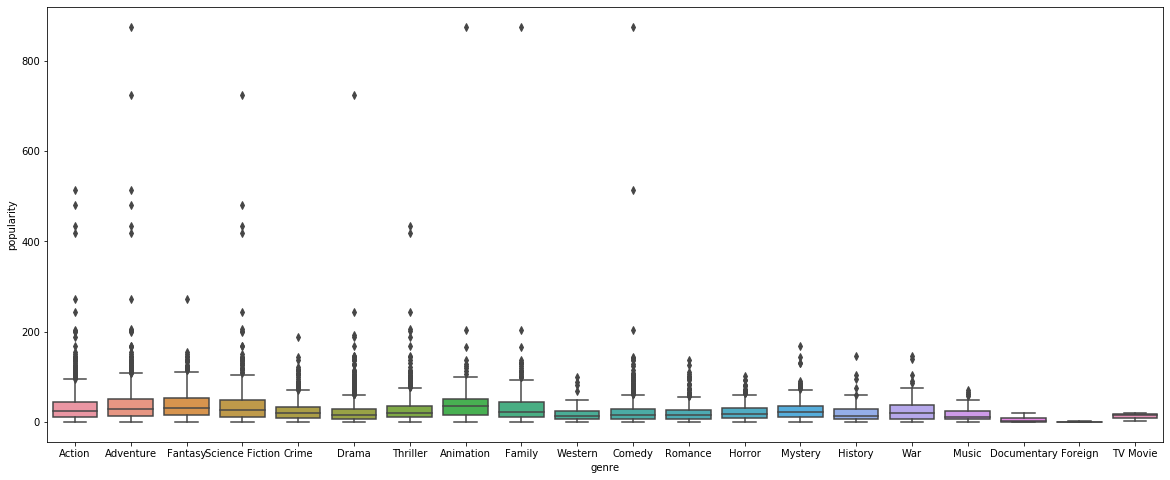

In [44]:
plt.figure(figsize=(20,8))
sns.boxplot(x="genre", y="popularity", data=q1, dodge=False);

<ul>
    <li>Found that there are outliers, so we will use median to calculate popularity per year each genre.</li>
    <li>Aggregate q1 dataframe to get: genre, release year, and median popularity.</li>
</ul>

In [45]:
q1_agg = q1.groupby(['genre','release_year'], as_index=False)['popularity'].median().rename(columns={'popularity':'median_popularity'})
print(q1_agg.shape)
q1_agg.head()

(939, 3)


,genre,release_year,median_popularity
0,Action,1930,8.484123
1,Action,1936,2.968235
2,Action,1949,3.851000
3,Action,1950,1.726175
4,Action,1952,8.988455


<ul><li>Create "genre, release_year" reference dataframe to be able calculate moving average popularity.</li></ul>

In [46]:
q1_agg['release_year'].min(),q1_agg['release_year'].max()

(1916, 2016)

In [47]:
years = np.arange(2016-1961+1) + 1961

In [48]:
genres = q1_agg['genre'].unique()

In [49]:
items = []
for genre in genres:
    for year in years:
        items += [{'genre':genre,'release_year':year}]

q1_agg_ref = pd.DataFrame(items)
q1_agg_ref.head()

,genre,release_year
0,Action,1961
1,Action,1962
2,Action,1963
3,Action,1964
4,Action,1965


<ul><li>Left join dataframe q1_agg_ref (reference of genre, year) and q1_agg (main data) to calculate moving average popularity.</li></ul>

In [50]:
q1_agg2 = q1_agg_ref.merge(q1_agg,how='left',left_on=['genre','release_year'],right_on=['genre','release_year'])

In [51]:
q1_agg2['ma30_median_popularity'] = q1_agg2.sort_values(by=['release_year'], ascending=True)\
                                        .groupby('genre')['median_popularity']\
                                        .rolling(30).mean()\
                                        .reset_index(drop=True, level=0)
q1_agg2.dropna().head()

,genre,release_year,median_popularity,ma30_median_popularity
37,Action,1998,19.711951,19.525392
38,Action,1999,17.561955,19.847373
39,Action,2000,14.655356,20.259696
40,Action,2001,15.205371,20.195080
41,Action,2002,21.605533,20.287641


In [52]:
q1_agg3 = q1_agg2.dropna()

Calculate median of moving average popularity per year.

In [53]:
q1_median_year = q1_agg2.groupby('release_year', as_index=False)['ma30_median_popularity'].median()
q1_median_year.rename(columns={'ma30_median_popularity':'median_ma30_median_popularity'}, inplace=True)
q1_median_year = q1_median_year.dropna()
q1_median_year.head()

,release_year,median_ma30_median_popularity
29,1990,17.244604
30,1991,21.632530
31,1992,21.446916
32,1993,21.529895
33,1994,21.226770


In [54]:
q1_agg3 = q1_agg2.dropna()
q1_agg3.head()

,genre,release_year,median_popularity,ma30_median_popularity
37,Action,1998,19.711951,19.525392
38,Action,1999,17.561955,19.847373
39,Action,2000,14.655356,20.259696
40,Action,2001,15.205371,20.195080
41,Action,2002,21.605533,20.287641


Create multi-line chart: Genre Popularity Trends.

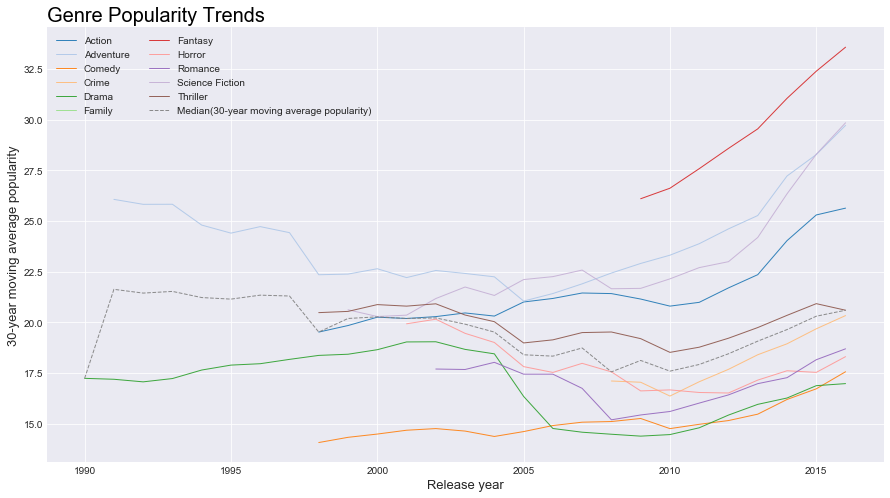

In [55]:
# style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))

# create a color palette
palette = plt.get_cmap('tab20')

# multiple line plot
num=0
for genre in q1_agg3['genre'].unique():
    plt.plot(q1_agg3[q1_agg3['genre']==genre].release_year,
             q1_agg3[q1_agg3['genre']==genre].ma30_median_popularity, 
             marker='', color=palette(num),linewidth=1, alpha=0.9, label=genre);
    num+=1

plt.plot(q1_median_year.release_year,
         q1_median_year.median_ma30_median_popularity, 
         marker='', color='gray', linewidth=1, alpha=0.9, linestyle='dashed', label='Median(30-year moving average popularity)');
    
# Add legend
plt.legend(loc=2, ncol=2);
 
# Add titles
plt.title("Genre Popularity Trends", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("Release year", fontsize=13);
plt.ylabel("30-year moving average popularity", fontsize=13);

_Finding(s):_ <br/>
Based on 30-year moving average popularity in 1990-2016, _**Fantasy, Adventure, Science Fiction, Action,**_ and _**Thiller**_ are the **most popular genres**. <br/>Those genres have 30-year moving average popularity higher than the median of 30-year moving average popularity.

### Question 2: How is the distribution of movie budget and movie revenue?

Get summary stat of movie budget and movie revenue.

In [56]:
df_matrix.describe()

,id,budget,revenue,runtime,popularity,vote_average,vote_count
count,3734.000000,3.734000e+03,3.734000e+03,3731.000000,3734.000000,3734.000000,3734.000000
mean,49661.312266,3.736029e+07,1.048403e+08,109.492093,26.175080,6.234574,863.242367
std,81330.797901,4.269019e+07,1.781406e+08,20.602237,34.519705,0.939710,1348.480126
min,5.000000,7.000000e+03,0.000000e+00,41.000000,0.001586,0.000000,0.000000
25%,6972.250000,8.550000e+06,6.743080e+06,95.000000,8.185175,5.700000,119.000000
50%,11972.000000,2.330000e+07,3.944905e+07,106.000000,17.709494,6.300000,371.500000
75%,49048.500000,5.000000e+07,1.226245e+08,120.000000,34.065604,6.900000,978.000000
max,417859.000000,3.800000e+08,2.787965e+09,338.000000,875.581305,8.500000,13752.000000


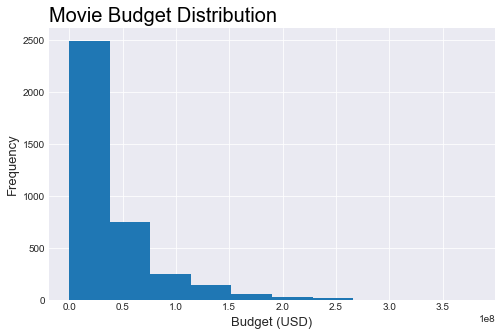

In [57]:
plt.figure(figsize=(8,5))
plt.hist(df_matrix['budget']);
plt.title("Movie Budget Distribution", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("Budget (USD)", fontsize=13);
plt.ylabel("Frequency", fontsize=13);

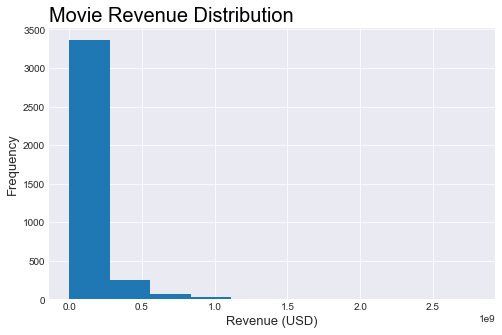

In [58]:
plt.figure(figsize=(8,5))
plt.hist(df_matrix['revenue']);
plt.title("Movie Revenue Distribution", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("Revenue (USD)", fontsize=13);
plt.ylabel("Frequency", fontsize=13);

Create histogram to show distribution of movie budget and movie revenue.

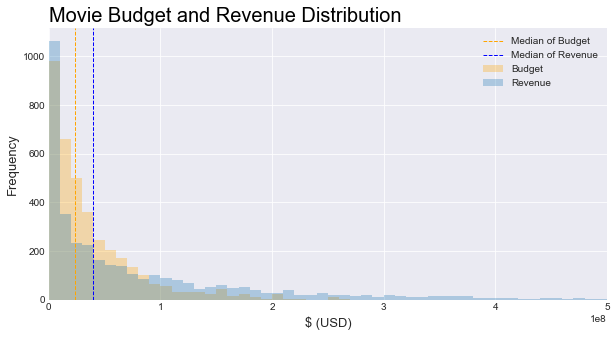

In [59]:
# Bin size 5e7
bin_edges = np.arange(0, 2.787965e9, 1e7)

plt.figure(figsize=(10,5));
plt.hist(df_matrix['budget'], bins=bin_edges, alpha=0.3, color='orange', label='Budget');
plt.hist(df_matrix['revenue'], bins=bin_edges, alpha=0.3, label='Revenue');

plt.axvline(df_matrix['budget'].median(), color='orange', linestyle='dashed', linewidth=1, label='Median of Budget')
plt.axvline(df_matrix['revenue'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median of Revenue')

# Set x-axis limit
plt.xlim(0,5e8)

# Add legend
plt.legend(loc=1, ncol=1);

# Add titles
plt.title("Movie Budget and Revenue Distribution", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("$ (USD)", fontsize=13);
plt.ylabel("Frequency", fontsize=13);

_Finding(s):_ <br/>
From 3734 observation data, 50% of movies have budget \$23.3M USD 
and get revenue \\$39.4M USD.

### Question 3: What kinds of properties are associated with movies that have high revenues?


Prepare data which contain movie properties.
<ul><li>
    Join df_matrix (to get all matrix), 
    df_mgenre (to get genres_count), 
    df_mkey (to get keywords_count), df_mlang (to get spoken_language_count),
    df_mcompany (to get production_companies_count), df_mcountry (to get production_countries_count).
    </li>
</ul>

In [60]:
q3 = df_matrix\
        .merge(df_mgenre.loc[:,['id','genres_count']], left_on='id', right_on='id', how='inner')\
        .merge(df_mkey.loc[:,['id','keywords_count']], left_on='id', right_on='id', how='inner')\
        .merge(df_mcompany.loc[:,['id','production_companies_count']], left_on='id', right_on='id', how='inner')\
        .merge(df_mcountry.loc[:,['id','production_countries_count']], left_on='id', right_on='id', how='inner')\
        .merge(df_mlang.loc[:,['id','spoken_languages_count']], left_on='id', right_on='id', how='inner')
print(q3.shape)
q3.head()

(3734, 12)


,id,budget,revenue,runtime,popularity,vote_average,vote_count,genres_count,keywords_count,production_companies_count,production_countries_count,spoken_languages_count
0,19995,237000000.0,2.787965e+09,162.0,150.437577,7.2,11800,4,21,4,2,2
1,285,300000000.0,9.610000e+08,169.0,139.082615,6.9,4500,3,16,3,1,1
2,206647,245000000.0,8.806746e+08,148.0,107.376788,6.3,4466,3,7,3,2,5
3,49026,250000000.0,1.084939e+09,165.0,112.312950,7.6,9106,4,21,4,1,1
4,49529,260000000.0,2.841391e+08,132.0,43.926995,6.1,2124,3,16,1,1,1


Create correlation matrix chart.

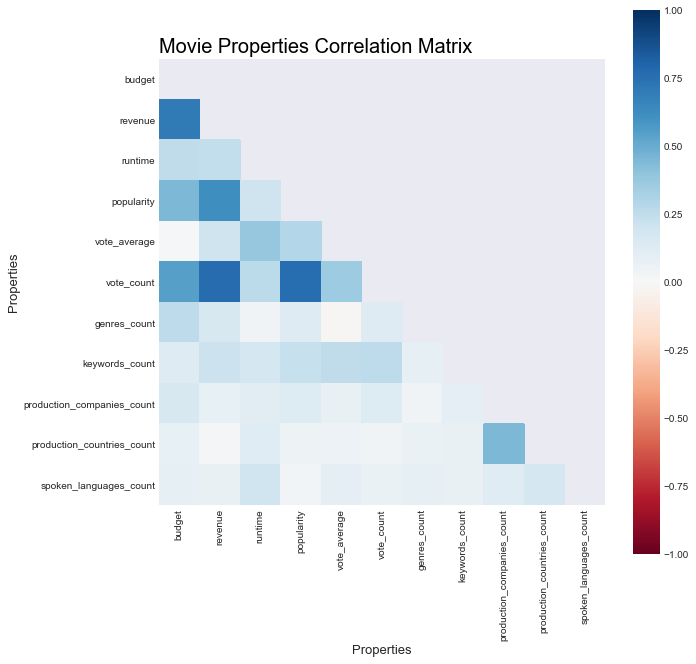

In [61]:
corrs = (q3.iloc[:,1:]).corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10));
sns.heatmap(corrs, cmap='RdBu', mask=mask, square=True, vmin=-1, vmax=1);

# Add titles
plt.title("Movie Properties Correlation Matrix", loc='left', fontsize=20, fontweight=0, color='black');
plt.xlabel("Properties", fontsize=13);
plt.ylabel("Properties", fontsize=13);

See data to get supporting idea in insight generation.

In [62]:
corrs[corrs['revenue']>=0.5].revenue

budget        0.708876
revenue       1.000000
popularity    0.619365
vote_count    0.767056
Name: revenue, dtype: float64

_Finding(s):_ <br/>
From 3734 observation data that we select from TMDB Movie Dataset, _**number of votes, budget amount,** and **movie popularity**_ score are properties which have **moderate positive correlation with revenue**.

<a id='conclusions'></a>
## Conclusions

- **Originally, we get 4803 observations** with 20 columns from TMDb movie data (source: <a href='https://www.kaggle.com/tmdb/tmdb-movie-metadata/data?select=tmdb_5000_movies.csv'>Kaggle</a>).
- We didn't found any duplicate data in the dataset.
- We did data cleaning which resulted **only 3734 observations that will be used in exploration data analysis**. 
<ul>
<li>Fix wrong data types for release_date (str to datetime), revenue (int to float), and budget (int to float) columns.</li>
<li>Remove 1069 observations due to missing release_date data and invalid budget data (budget less than $1000 USD).</li>
<li>Replace runtime value with None for 2 observations which have runtime equal to 0.</li>
<li>Standardize multiple values format by using ';' separator for genres, keywords, production_companies, production_countries, and spoken_language columns.</li>
<li>Create separate genre dataframe which contain data which is the result of normalization from column genres to be able to answer research question: Which genres are most popular from year to year?</li>
</ul>
- We used cleaned dataset which contains 3734 observations in exploratory data analysis. Here are insights that we get from answeing research questions:
<ul>
<li>Based on 30-year moving average popularity in 1990-2016, Fantasy, Adventure, Science Fiction, Action, and Thiller are the most popular genres. Those genres have 30-year moving average popularity higher than the median of 30-year moving average popularity.</li>
<li>From statistic summary of moview budget and revenue, 50% of movies have budget \$23.3M USD and get revenue \$39.4M USD.</li>
<li>Number of votes, budget amount, and movie popularity score are properties which have moderate positive correlation with revenue.</li>
</ul>

<a id='references'></a>
## References
<ul>
    <li><a href='https://www.kaggle.com/tmdb/tmdb-movie-metadata/data?select=tmdb_5000_movies.csv'>TMDB 5000 Movie Dataset</a>, Kaggle</li>
    <li><a href='https://towardsdatascience.com/sql-window-functions-in-python-pandas-data-science-dc7c7a63cbb4'>SQL-like window functions in Pandas</a>, Towards Data Science</li>
    <li><a href='https://seaborn.pydata.org/generated/seaborn.boxplot.html'>Seaborn Boxplot</a>, Seaborn Pydata</li>
    <li><a href='https://python-graph-gallery.com/124-spaghetti-plot/'>Spaghetti Plot</a>, Python Graph Gallery</li>
    <li><a href='https://raphaelvallat.com/correlation.html'>Correlation(s) in Python</a>, Raphael Vallat</li>
</ul>

<a id='References'></a>